In [1]:
#importing libraries required
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#importing the model
from sklearn.linear_model import LogisticRegression

In [3]:
#reading the data 
data = pd.read_csv("C:/Users/Dell1/Desktop/ML_SUMMER21/Diabetes.csv")
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Replacing Zeros entries with mean for better results
mean_ST = data['SkinThickness'].mean(skipna=True)
data = data.replace({'SkinThickness':{0:mean_ST}})
mean_IN = data['Insulin'].mean(skipna=True)
data = data.replace({'Insulin':{0:mean_IN}})
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


In [5]:
#splitting data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [6]:
#model
regressor = LogisticRegression()
regressor.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
#predicting the output 
y_pred = regressor.predict(x_test)
print(y_pred)

[1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


[[118  12]
 [ 23  39]]


<AxesSubplot:>

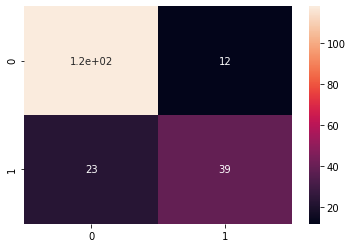

In [8]:
from sklearn import metrics
cf = metrics.confusion_matrix(y_test,y_pred)
print(cf)
sns.heatmap(cf,annot = True)

In [9]:
accuracy = metrics.accuracy_score(y_pred,y_test)
print(accuracy*100)

81.77083333333334
